In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
fold='../prep/'

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier # use this in future, contains other two
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics


/Users/germanchaparro/miniconda2/envs/py36/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
dfpno=pd.read_csv(fold+'proc_no_pert.csv',index_col=None)
dfpno["gia"]=dfpno.ngi>0
dfplo=pd.read_csv(fold+'proc_lo_pert.csv',index_col=None)
dfplo["gia"]=dfplo.ngi>0
dfphi=pd.read_csv(fold+'proc_hi_pert.csv',index_col=None)
dfphi["gia"]=dfphi.ngi>0

In [6]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

In [7]:
dfpno.columns

Index(['Unnamed: 0', 'ident', 'com', 'nplanets', 'massbudget',
       'massefficiency', 'sigmag0', 'md', 'rc', 'ms', 'metal', 'taugas',
       'qest', 'ngi', 'mtr', 'apert', 'gia'],
      dtype='object')

In [8]:
def probch(model,X,y):
    check=[]
    for i in range(len(X)):
        check+=[model.predict(np.array([X[i]]))==y[i]]
    check=np.array(check)
    print(check.sum()*100/len(check))

In [93]:
inlist=['sigmag0', 'md', 'rc', 'ms', 'metal', 'taugas', 'qest','apert']
#inlist=[ 'sigmag0']

In [86]:
inlist=[ 'com']

In [87]:
Xno=np.array(dfpno[inlist])
yno=dfpno.gia*1
Xlo=np.array(dfplo[inlist])
ylo=dfplo.gia*1
Xhi=np.array(dfphi[inlist])
yhi=dfphi.gia*1
X=np.vstack([Xno,Xlo,Xhi])
y=np.hstack([yno,ylo,yhi])

In [94]:
Xno=np.array(dfpno[inlist])
yno=dfpno.com
Xlo=np.array(dfplo[inlist])
ylo=dfplo.com
Xhi=np.array(dfphi[inlist])
yhi=dfphi.com
X=np.vstack([Xno,Xlo,Xhi])
y=np.hstack([yno,ylo,yhi])

In [95]:
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)

ValueError: Unknown label type: 'continuous'

In [89]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,
                                                random_state=1)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [90]:
print(metrics.classification_report(ypred, ytest))


             precision    recall  f1-score   support

          0       0.90      0.90      0.90       694
          1       0.68      0.68      0.68       222

avg / total       0.84      0.84      0.84       916



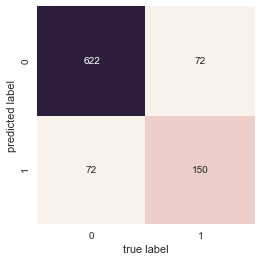

In [92]:
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.savefig('../../../Downloads/finrf.png',dpi=300)

In [12]:
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [13]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,
                                                random_state=1)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [14]:
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       0.84      0.83      0.84       705
          1       0.46      0.49      0.48       211

avg / total       0.76      0.75      0.75       916



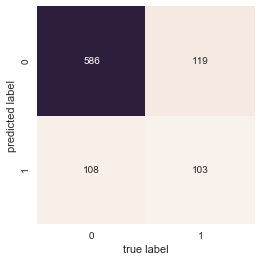

In [15]:
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [50]:
tree = DecisionTreeClassifier().fit(X, y)
probch(tree,X,y)
probch(tree,Xno,yno)
probch(tree,Xlo,ylo)
probch(tree,Xhi,yhi)

100.0
100.0
100.0
100.0


In [51]:
print(100-dfpno.gia.sum()*100/len(dfpno),100-dfplo.gia.sum()*100/len(dfplo),100-dfphi.gia.sum()*100/len(dfphi))

78.0507780508 74.9385749386 74.6721311475


In [52]:
probch(bag,X,y)
probch(bag,Xno,yno)
probch(bag,Xlo,ylo)
probch(bag,Xhi,yhi)

99.7542326597


KeyboardInterrupt: 

In [218]:
ix0=np.arange(len(y))[y==0]

In [219]:
np.random.seed(3)
ix0r=ix0[np.random.choice([True,False],len(ix0),p=[0.5,0.5])]

In [220]:
X0=np.array([X[i] for i in ix0r])
y0=np.array([y[i] for i in ix0r])
X1=X[y==1]
y1=y[y==1]
X50=np.vstack((X0,X1))
y50=np.hstack((y0,y1))

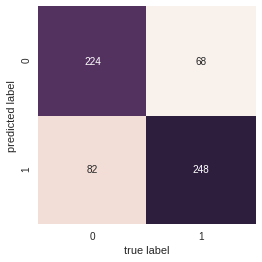

In [221]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X50,y50,
                                                random_state=1)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [222]:
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       0.73      0.77      0.75       292
          1       0.78      0.75      0.77       330

avg / total       0.76      0.76      0.76       622



In [223]:
dfpno.columns

Index(['Unnamed: 0', 'ident', 'com', 'nplanets', 'massbudget',
       'massefficiency', 'sigmag0', 'md', 'rc', 'ms', 'metal', 'taugas',
       'qest', 'scfac', 'ngi', 'mtr', 'apert', 'gia'],
      dtype='object')

In [579]:
inlist=[ 'ngi','massbudget','com']

Xno=np.array(dfpno[inlist])
yno=np.ones((len(dfpno)))*0
Xhi=np.array(dfphi[inlist])
yhi=np.ones((len(dfpno)))*1
X=np.vstack([Xno,Xhi])
y=np.hstack([yno,yhi])

In [580]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,
                                                random_state=1)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [581]:
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

        0.0       0.57      0.54      0.55       314
        1.0       0.55      0.58      0.56       304

avg / total       0.56      0.56      0.56       618



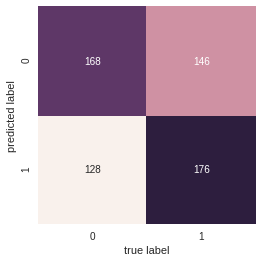

In [582]:
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [505]:
dfpno.columns

Index(['Unnamed: 0', 'ident', 'com', 'nplanets', 'massbudget',
       'massefficiency', 'sigmag0', 'md', 'rc', 'ms', 'metal', 'taugas',
       'qest', 'scfac', 'ngi', 'mtr', 'apert', 'gia'],
      dtype='object')

In [590]:
inlist=['com']

Xno=np.array(dfpno[inlist])
yno=np.ones((len(dfpno)))*0
Xlo=np.array(dfplo[inlist])
ylo=np.ones((len(dfplo)))*1
Xhi=np.array(dfphi[inlist])
yhi=np.ones((len(dfpno)))*1

In [591]:
Xgi=np.vstack((Xno[dfpno.gia],Xhi[dfphi.gia]))
ygi=np.hstack((yno[dfpno.gia],yhi[dfphi.gia]))

In [592]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xgi,ygi,
                                                random_state=1)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [569]:
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

        0.0       0.60      0.56      0.58        94
        1.0       0.65      0.68      0.66       112

avg / total       0.62      0.63      0.63       206



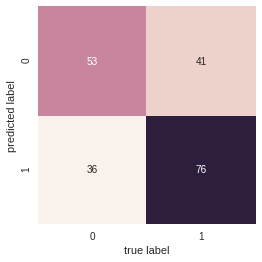

In [570]:
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [594]:
Xtrain[0]

array([ 3.46490323])

In [602]:
model.predict(7.52)

array([ 0.])

In [58]:
#X=np.arange(len(X))[:,np.newaxis]

IndexError: index 1 is out of bounds for axis 1 with size 1

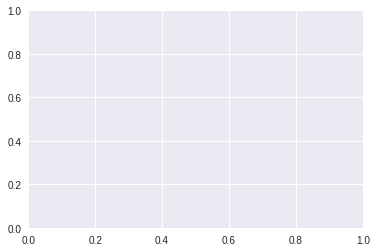

In [172]:
visualize_classifier(DecisionTreeClassifier(), X, y)

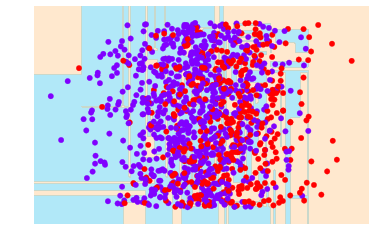

In [45]:
visualize_classifier(DecisionTreeClassifier(), Xlo, ylo)

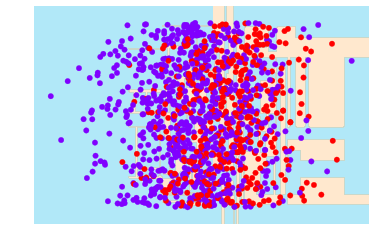

In [46]:
visualize_classifier(DecisionTreeClassifier(), Xhi, yhi)

In [80]:
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

IndexError: index 1 is out of bounds for axis 1 with size 1

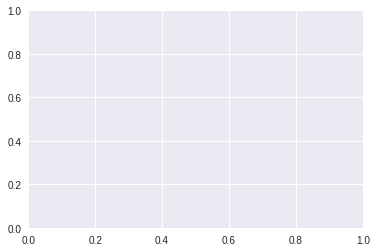

In [81]:
visualize_classifier(bag, X, y)

In [ ]:
#giant planet or no planet random forest prediction? first approach try to predict if there will be giant planets
#second analyze terrestrial systems (with/without giants)
#third analyze giant systems